## Aula 6 - Gradientes de Imagem

Os filtros de passa-alta têm como objetivo realçar varias bruscas de pixels, que são as regiões de borda.

Iremos ver os seguintes filtros:

- Sobel
- Scharr
- Laplaciano
- e também o Canny Edge

Vamos importar as bibliotecas necessárias:

In [2]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
from scipy import ndimage

E agora, vamos carregar a imagem da Lenna:

In [3]:
img = plt.imread('lenna.jpg')
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'lenna.jpg'

### Sobel

Usaremos o método [cv.Sobel()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d), que já está implementado no OpenCV, para calcular o Sobel em X, o Sobel em Y, e depois vamos realizar a soma para visualizar a imagem resultante.

Dentre os argumentos que o método recebe, o método pede pra especificar o argumento [**ddepth**](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel). Este argumento controla a profundidade da imagem resultante, não em quantidade de canais, mas em tipo de dado. O padrão é definir como **CV_8U**, que é o equivalente a **np.uint8** - uma imagem com 8 bits do tipo *unsigned* (0-255). Usar esse tipo irá acarretar em truncamento da informação dos pixels.

In [ ]:
img_sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].imshow(img_sobelx)
ax[1].imshow(img_sobely)

A princípio, não conseguimos notar tanta diferença. Vamos brincar com os valores e ver o resultado.

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
def f(d, sigmaColor, sigmaSpace):
    img_borrada = cv2.bilateralFilter(img,d=d,sigmaColor=sigmaColor,sigmaSpace=sigmaSpace)
    plt.imshow(img_borrada)
    #return a+b

In [5]:
w = interactive(f, d=15, sigmaColor=100, sigmaSpace=100)

In [6]:
display(w)

interactive(children=(IntSlider(value=15, description='d', max=45, min=-15), IntSlider(value=100, description=…

Agora já conseguimos ver melhor o borrão. Vamos ver outras configurações:

### Box filter

Podemos usar o método [cv2.boxFilter()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3) pra implementar o filtro box:

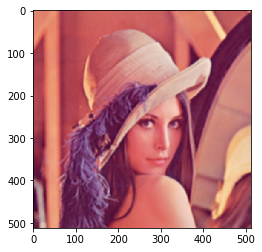

In [22]:
img_box = cv2.boxFilter(img,-1,(5,5))
plt.imshow(img_box)

### Imagens integrais

Novamente, o OpenCV já vem com um método pronto pra realizar o cálculo de uma imagem integral. O método [cv2.integral()](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#integral) nos retorna a imagem integral de uma imagem dada. Vamos calcular a imagem integral da nossa imagem de testes:

In [7]:
soma = np.zeros((512+1,512+1),dtype='uint8')  
integral = cv2.integral(img,soma,-1)[1:,1:]
print(integral.shape)

(512, 512, 3)


### Pirâmides de imagens

Podemos usar os métodos [cv2.pyrDown()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaf9bba239dfca11654cb7f50f889fc2ff) e [cv2.pyrUp()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gada75b59bdaaca411ed6fee10085eb784) para trabalhar com as pirâmides. Vamos fazer um exemplo:

(256, 256, 3)


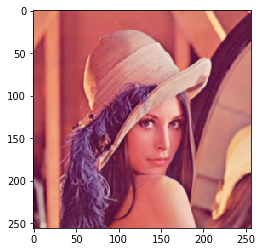

In [14]:
img_pyrdown = cv2.pyrDown(img)
plt.imshow(img_pyrdown)
print(img_pyrdown.shape)

(512, 512, 3)


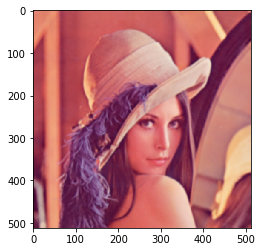

In [15]:
img_pyrup = cv2.pyrUp(img_pyrdown)
plt.imshow(img_pyrup)
print(img_pyrup.shape)

Será que a imagem original é igual a imagem acima?

In [18]:
(img == img_pyrup).all()

False

In [19]:
def pyr(down, up):
    img_pyr = img.copy()
    for i in range(down):
        img_pyr = cv2.pyrDown(img_pyr)
    for i in range(up):
        img_pyr = cv2.pyrUp(img_pyr)
    
    plt.imshow(img_pyr)
    print(img_pyr.shape)
    #return a+b

In [20]:
k = interactive(pyr, down=(0,10), up=(0,10))
display(k)

interactive(children=(IntSlider(value=5, description='down', max=10), IntSlider(value=5, description='up', max…